In [1]:
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

y[0] # classe do primeiro elemento
X[:1, :] # primeiro elemento a classificar

array([[5.1, 3.5]])

In [3]:
iteracoes = range(1, 10)

In [4]:
cv_scores = []
for k in iteracoes:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.16)
Accuracy: 0.71 (+/- 0.20)
Accuracy: 0.74 (+/- 0.23)
Accuracy: 0.70 (+/- 0.24)
Accuracy: 0.75 (+/- 0.17)
Accuracy: 0.77 (+/- 0.19)
Accuracy: 0.78 (+/- 0.20)
Accuracy: 0.77 (+/- 0.18)
Accuracy: 0.79 (+/- 0.16)


In [5]:
def printPlot(x, y, x_label, y_label):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

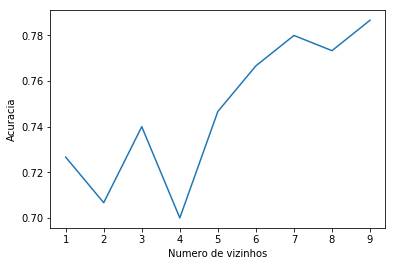

In [6]:
printPlot(iteracoes, cv_scores, 'Numero de vizinhos', 'Acuracia')

In [7]:
svm_scores = []
for c in iteracoes:
    clf = svm.SVC(kernel='linear', C=c)
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    svm_scores.append(scores.mean())
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.16)
Accuracy: 0.81 (+/- 0.16)
Accuracy: 0.81 (+/- 0.16)
Accuracy: 0.81 (+/- 0.16)
Accuracy: 0.81 (+/- 0.16)
Accuracy: 0.81 (+/- 0.15)
Accuracy: 0.80 (+/- 0.15)
Accuracy: 0.80 (+/- 0.15)
Accuracy: 0.81 (+/- 0.15)


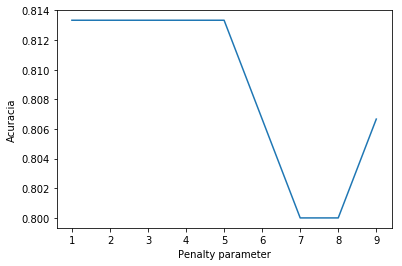

In [8]:
printPlot(iteracoes, svm_scores, 'Penalty parameter', 'Acuracia')

In [9]:
parameters = {'n_neighbors':iteracoes}
knn_hps = GridSearchCV(knn, parameters)
knn_hps.fit(X, y)
knn_hps.best_params_['n_neighbors']
print("Melhor valor para o parâmetro n_neighbors: {0}".format(knn_hps.best_params_['n_neighbors']))

Melhor valor para o parâmetro n_neighbors: 9


In [10]:
parameters = {'C':iteracoes}
svm_hps = GridSearchCV(clf, parameters)
svm_hps.fit(X, y)
svm_hps.best_params_['C']
print("Melhor valor para o parâmetro C: {0}".format(svm_hps.best_params_['C']))

Melhor valor para o parâmetro C: 3
